# Deep Learning - Artificial Neural Networks

In [1]:
# pip install tensorflow
import tensorflow as tf

# DNN - Classficiation 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('data/pima-indians-diabetes.csv')

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.shape

(768, 9)

* data shape must be 1000 at least for DL

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
X = df.drop('Outcome',axis=1) # X = df.iloc[:,:-1] 
y = df[['Outcome']] # y = df.iloc[:,-1]

In [7]:
model = Sequential() 
model.add(Dense(120, activation='relu')) #input_dim : number of features
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu')),
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


* create model
* new layers neurons are added
* relu : Rectified Linear Unit is used for hidden layers
* sigmoid is used for binary classification
* adam : Adaptive Moment Estimation is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

In [8]:
model.fit(X, y, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - accuracy: 0.5973 - loss: 0.7083 - val_accuracy: 0.6429 - val_loss: 0.6906
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6194 - loss: 0.6903 - val_accuracy: 0.6429 - val_loss: 0.6882
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6359 - loss: 0.6879 - val_accuracy: 0.6429 - val_loss: 0.6862
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6711 - loss: 0.6841 - val_accuracy: 0.6429 - val_loss: 0.6839
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6729 - loss: 0.6813 - val_accuracy: 0.6429 - val_loss: 0.6819
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6760 - loss: 0.6785 - val_accuracy: 0.6429 - val_loss: 0.6800
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6501 - loss: 0.6787 - val_accuracy: 0.6429 - val_loss: 0.6782
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6451 - loss: 0.6775 - val_accuracy: 0.64

* epochs : number of iterations
* batch_size : number of samples per gradient update
* validation_split : 20% of the data will be used for validation
* verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch.
* shuffle : whether to shuffle the training data before each epoch

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,877 (218.27 KB)

 Trainable params: 18,625 (72.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,252 (145.52 KB)

In [10]:
from sklearn.preprocessing import scale,normalize
X = scale(X)
history = model.fit(X, y, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6542 - loss: 0.6316 - val_accuracy: 0.6429 - val_loss: 0.5680
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6916 - loss: 0.5436 - val_accuracy: 0.7792 - val_loss: 0.5173
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7869 - loss: 0.4448 - val_accuracy: 0.7338 - val_loss: 0.5150
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7755 - loss: 0.4631 - val_accuracy: 0.7727 - val_loss: 0.4797
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7859 - loss: 0.4279 - val_accuracy: 0.7792 - val_loss: 0.4871
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7976 - loss: 0.4161 - val_accuracy: 0.7792 - val_loss: 0.4648
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7944 - loss: 0.4110 - val_accuracy: 0.7597 - val_loss: 0.4892
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7813 - loss: 0.4042 - val_accuracy: 0.7922 - 

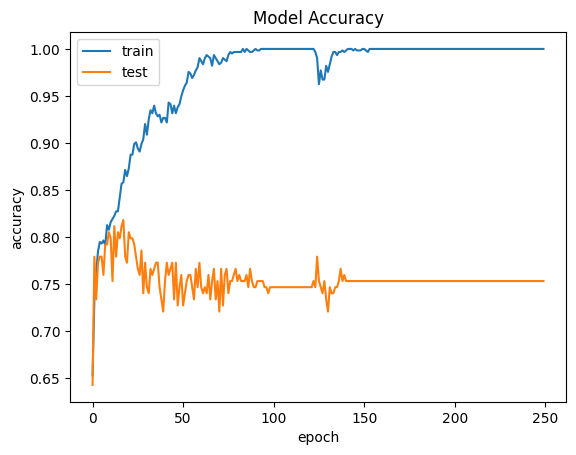

In [11]:
#visualization
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


* train and test accuracy is increasing with epochs. but test accuracy is less than train accuracy. this is overfitting. we need to stop training at 50 epochs.
* we can use early stopping to stop training at 50 epochs.
* we can use dropout to avoid overfitting.
* we can use batch normalization to avoid overfitting.
* data shape is too small for deep learning model. we can use machine learning models like logistic regression, decision tree, random forest, svm etc.

# DNN - Regression

In [12]:
df = pd.read_pickle('data/kc_house.pkl')
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'view', 'basement',
       'waterfront', 'floors', 'age', 'renovated', 'condition', 'sqft_above',
       'price', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipc

In [14]:
df.shape

(19034, 82)

In [15]:
X = df.drop('price',axis=1)
y = df[['price']]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
model = Sequential() 
model.add(Dense(120, activation='relu')) #input_dim : number of features
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu')),
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

* mse : mean squared error is used for regression problems. its the square of the difference between the predicted and actual value
* why dont we use activation function in the output layer? 
  * because we are predicting a continuous value

In [18]:
history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=0)

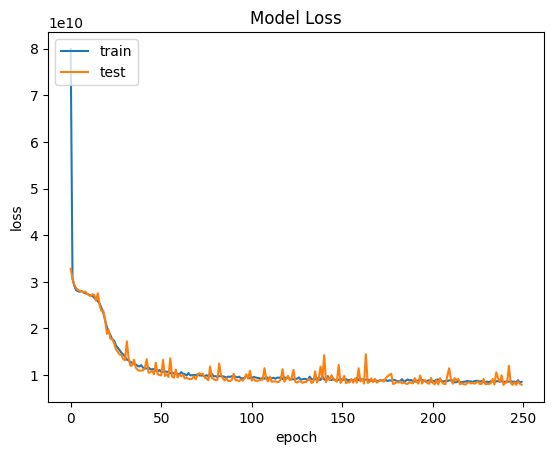

In [19]:
#visualization
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [20]:
predictions = model.predict(X_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [21]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error : ",mean_squared_error(y_test,predictions))
print("R2 Score : ",r2_score(y_test,predictions))

Mean Squared Error :  9072789303.244875
R2 Score :  0.8228001349149481
